In [2]:
# see https://machinelearningmastery.com/white-noise-time-series-python/

In [66]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

In [67]:
# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


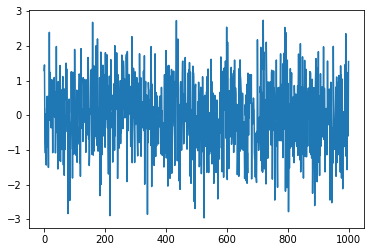

In [68]:
# line plot
series.plot();

<AxesSubplot:>

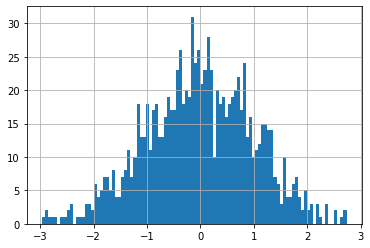

In [69]:
# histogram plot
series.hist(bins=100)

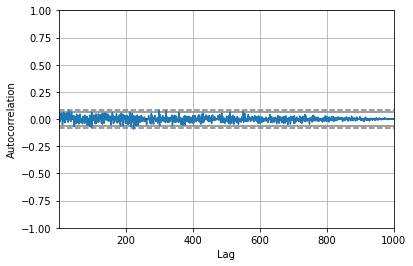

In [70]:
autocorrelation_plot(series);

In [71]:
from scipy import fft
import numpy as np

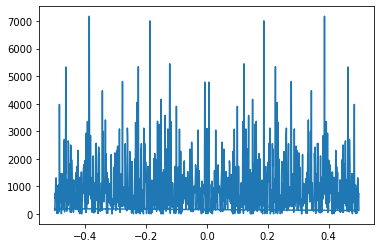

In [73]:
fft_series = fft.fft(series.values)

# And the power (sig_fft is of complex dtype)
power_series = np.abs(fft_series)**2

# The corresponding frequencies
freq_series = fft.fftfreq(fft_series.size)

# Plot the FFT power
plt.plot(freq_series, power_series);

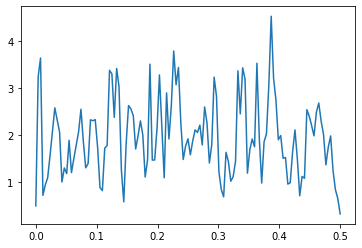

In [74]:
import matplotlib.pyplot as plt
from scipy import signal
freq, power = signal.welch(series, fs=1)
plt.plot(freq,power);

In [77]:
import pandas as pd
import darts
ds_series = pd.Series(series)
ts_series = darts.TimeSeries.from_series(ds_series)

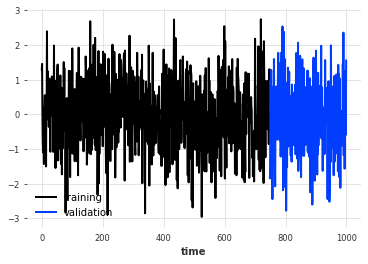

In [79]:
train, val = ts_series.split_before(0.75)
train.plot(label="training")
val.plot(label="validation")

In [127]:
from darts.metrics import mase
from darts.models import NaiveSeasonal, NaiveMean, NaiveDrift, ExponentialSmoothing, TBATS, ARIMA, AutoARIMA, Theta
from darts.utils.statistics import plot_residuals_analysis

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MASE: {:.2f}%".format(model, mase(val, forecast, train)))
    ts_series.plot(label="actual")
    forecast.plot(label="forecast")
    plot_residuals_analysis(val)

model Naive seasonal model, with K=1 obtains MASE: 0.96%


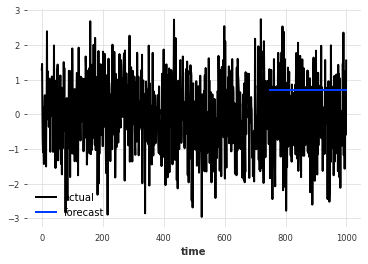

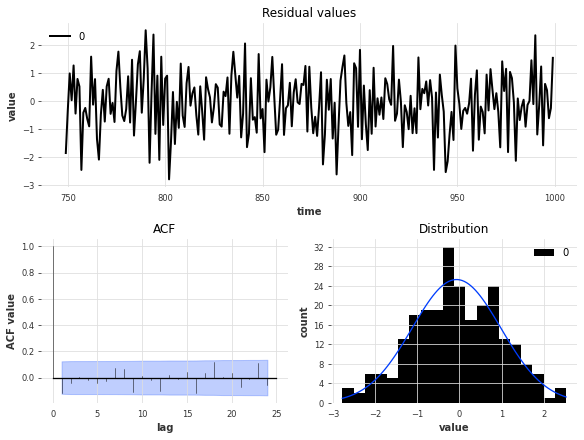

In [102]:
eval_model(NaiveSeasonal())

model Naive mean predictor model obtains MASE: 0.78%


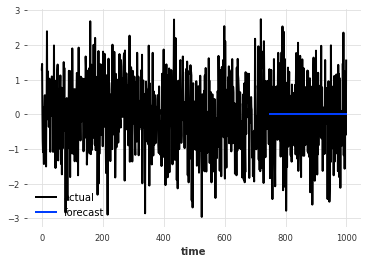

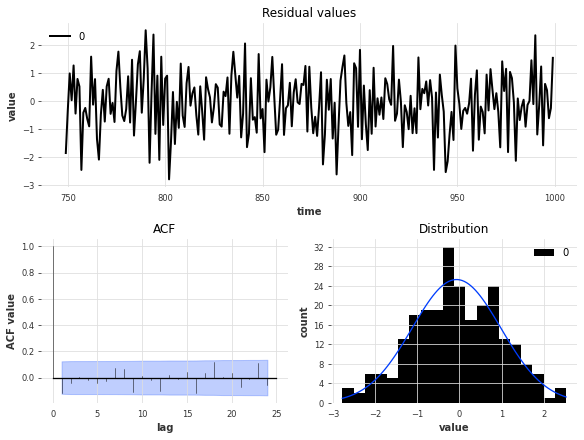

In [103]:
eval_model(NaiveMean())

model Naive drift model obtains MASE: 0.92%


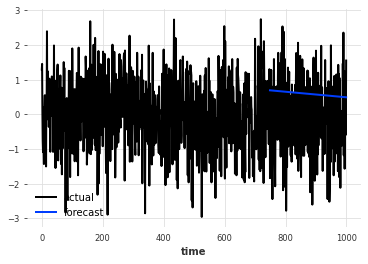

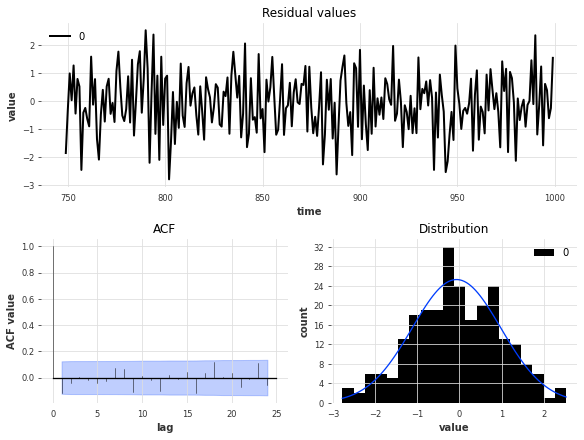

In [104]:
eval_model(NaiveDrift())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MASE: 0.79%


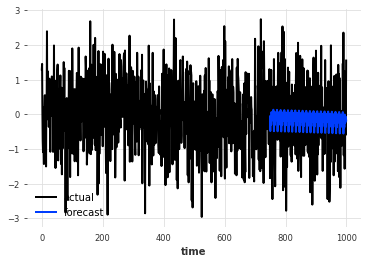

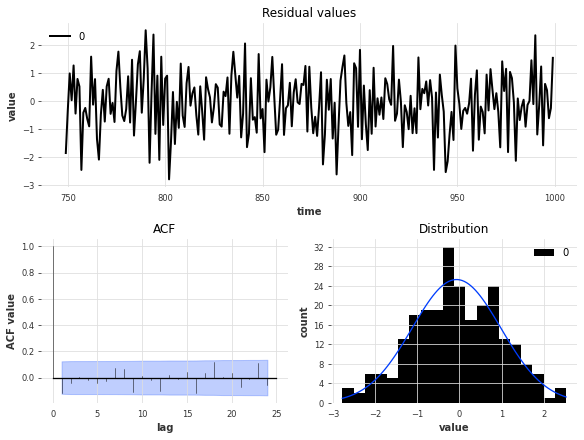

In [105]:
eval_model(ExponentialSmoothing())

model Auto-ARIMA obtains MASE: 0.78%


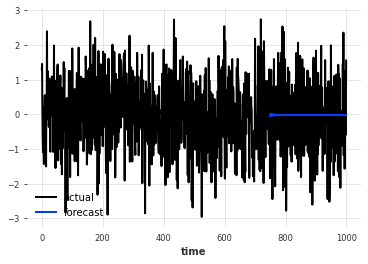

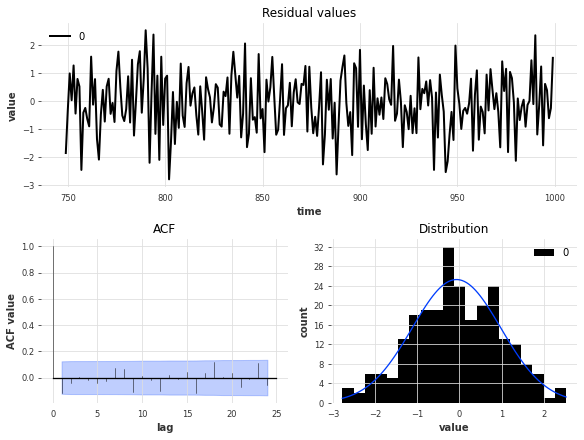

In [106]:
eval_model(AutoARIMA())

In [116]:
def eval_model_2(model):
    model.fit(train)
    historical_fcast = model.historical_forecasts(ts_series, start=0.75, retrain=True)
    print("model {} obtains MASE: {:.2f}%".format(model, mase(val, historical_fcast, train)))
    val.plot(label="actual")
    historical_fcast.plot(label="forecast")
    plot_residuals_analysis(val)

model Naive seasonal model, with K=1 obtains MASE: 1.21%


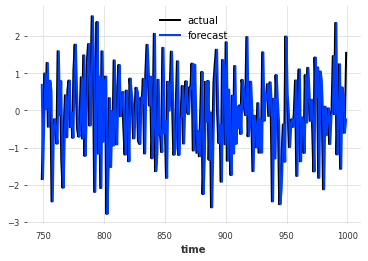

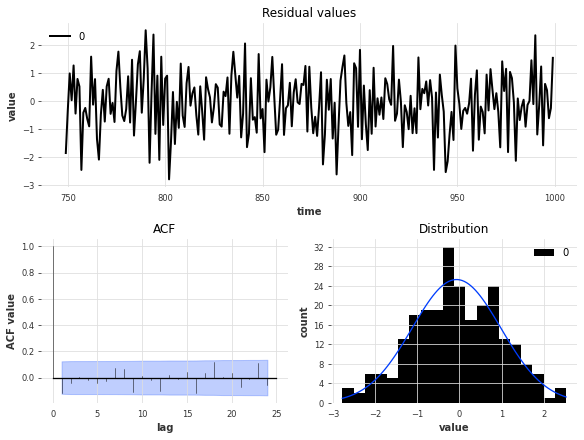

In [129]:
eval_model_2(NaiveSeasonal())

model ARIMA(0, 0, 1) obtains MASE: 0.79%


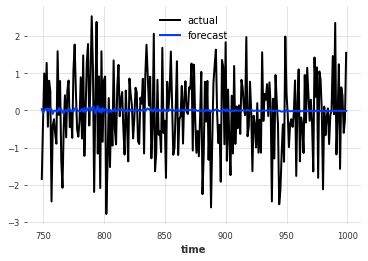

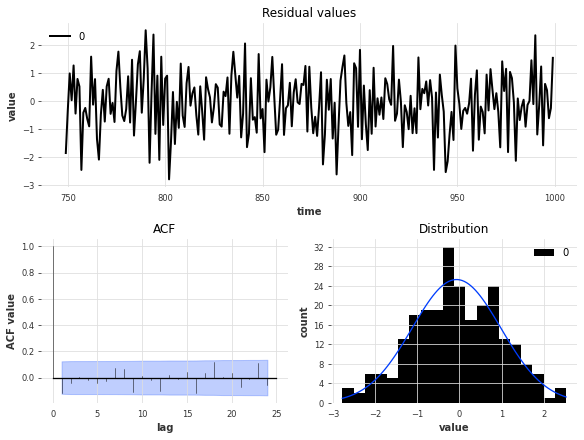

In [133]:
eval_model_2(ARIMA(0,0,1))

model Naive mean predictor model obtains MASE: 0.78%


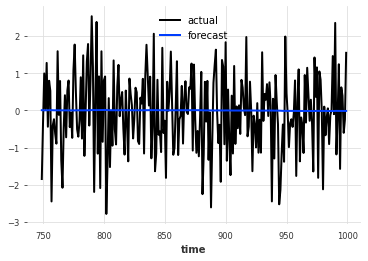

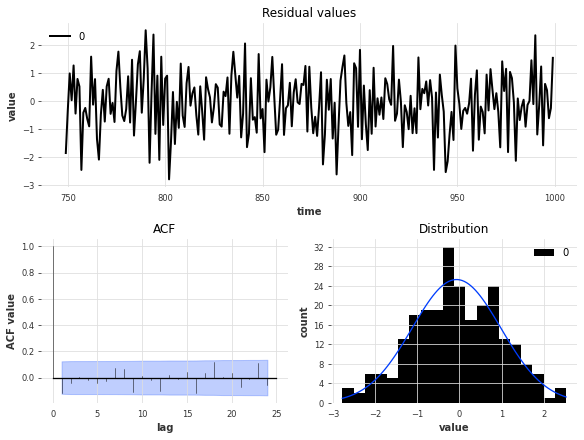

In [130]:
eval_model_2(NaiveMean())